In [16]:
import tensorflow as tf
import pandas as pd 
from keras.utils import to_categorical
import random
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, array_to_img, img_to_array
from tensorflow.keras.models import Sequential
from glob import glob

import cv2

In [17]:
# Define Constants by re-sizing all the images
IMAGE_SIZE = [224, 224]

train_path = 'train'



In [18]:
# Function to display images
def display_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

In [19]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
for layer in inception.layers:
    layer.trainable = False

In [21]:
folders = glob('train/*')
folders

['train\\apple stage 1',
 'train\\apple stage2',
 'train\\apple stage3',
 'train\\banana stage 1',
 'train\\banana stage 2',
 'train\\banana stage 3',
 'train\\Brinjal  Stage 1',
 'train\\Brinjal  Stage 2',
 'train\\Brinjal Stage 3',
 'train\\cabbage stage 1',
 'train\\cabbage stage 2',
 'train\\cabbage stage 3',
 'train\\cucumber Satae 2',
 'train\\cucumber Stage 1',
 'train\\cucumber Stage 3',
 'train\\green grapes stage 1',
 'train\\green grapes stage 2',
 'train\\green grapes stage 3',
 'train\\mango  stage 2',
 'train\\mango stage 1',
 'train\\mango stage 3',
 'train\\papaya  stage 1',
 'train\\papaya  stage 2',
 'train\\papaya stage 3',
 'train\\potato  stage 3',
 'train\\potato stage 1',
 'train\\potato stage 2',
 'train\\tomatto stage 1',
 'train\\tomatto stage 2',
 'train\\tomatto stage 3']

In [22]:
x = Flatten()(inception.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [23]:
model = Model(inputs=inception.input, outputs=prediction)

# View the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [25]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
# Training Generator
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 879 images belonging to 30 classes.


In [27]:
# Testing Generator
test_set = test_datagen.flow_from_directory('train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 879 images belonging to 30 classes.


In [28]:
# fit the model, it will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/100
28/28 [==============================] - 65s 2s/step - loss: 6.5218 - accuracy: 0.6200 - val_loss: 2.2237 - val_accuracy: 0.8362
Epoch 2/100
28/28 [==============================] - 59s 2s/step - loss: 2.4542 - accuracy: 0.8259 - val_loss: 0.9289 - val_accuracy: 0.8908
Epoch 3/100
28/28 [==============================] - 62s 2s/step - loss: 2.2125 - accuracy: 0.8521 - val_loss: 1.4557 - val_accuracy: 0.9033
Epoch 4/100
28/28 [==============================] - 62s 2s/step - loss: 1.5895 - accuracy: 0.9022 - val_loss: 0.7896 - val_accuracy: 0.9397
Epoch 5/100
28/28 [==============================] - 58s 2s/step - loss: 1.6194 - accuracy: 0.9101 - val_loss: 2.7294 - val_accuracy: 0.8749
Epoch 6/100
28/28 [==============================] - 62s 2s/step - loss: 1.2618 - accuracy: 0.9181 - val_loss: 2.0845 - val_accuracy: 0.9078
Epoch 7/100
28/28 [==============================] - 62s 2s/step - loss: 1.4336 - accuracy: 0.9078 - val_loss: 1.3561 - val_accuracy: 0.9249
Epoch 8/100
2

In [29]:
from sklearn.metrics import classification_report
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_classes = [np.argmax(prediction) for prediction in predictions]

# Convert true labels to class labels
true_classes = test_set.classes

# Get the class labels
class_labels = list(test_set.class_indices.keys())

# Generate classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

28/28 [==============================] - 20s 675ms/step
                      precision    recall  f1-score   support

    Brinjal  Stage 1       0.00      0.00      0.00        19
    Brinjal  Stage 2       0.04      0.04      0.04        25
     Brinjal Stage 3       0.00      0.00      0.00        23
       apple stage 1       0.00      0.00      0.00        27
        apple stage2       0.06      0.06      0.06        36
        apple stage3       0.04      0.04      0.04        56
      banana stage 1       0.10      0.10      0.10       101
      banana stage 2       0.03      0.03      0.03        29
      banana stage 3       0.03      0.03      0.03        64
     cabbage stage 1       0.00      0.00      0.00        18
     cabbage stage 2       0.00      0.00      0.00        24
     cabbage stage 3       0.04      0.04      0.04        23
    cucumber Satae 2       0.00      0.00      0.00        16
    cucumber Stage 1       0.00      0.00      0.00        24
    cucumber 

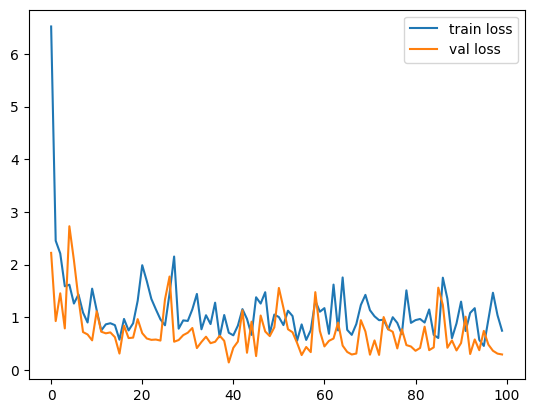

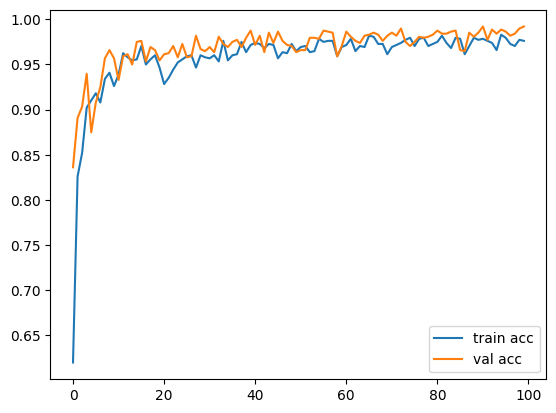

<Figure size 640x480 with 0 Axes>

In [30]:
# Plot the Loss and Accuracy
# Loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [31]:
# Saving the model as a h5 file

from tensorflow.keras.models import load_model
model.save('keras_model.h5')

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
y_pred = model.predict(test_set)
y_pred

28/28 [==============================] - 19s 683ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 2.0142409e-20, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([29,  6, 17, 12, 17, 27,  0, 10, 14, 10,  6,  6,  3,  5, 16, 22,  0,
       25,  6,  6,  4, 23, 17, 23, 10, 23,  6, 13, 21, 16,  4,  0,  7, 11,
       12, 18, 24,  3, 14,  6, 25,  5,  2, 10, 23, 15, 26, 12, 21, 24, 22,
        1, 10,  6,  9, 15, 23,  6,  8, 27,  5, 26, 19, 21,  5, 23,  9,  0,
        6, 19,  6, 16, 21,  3, 26,  6,  6,  4, 26, 27, 27, 13, 25, 29, 11,
        6, 20, 15,  7,  8, 14,  4, 24,  6, 11, 29,  1,  3, 27, 23,  5,  2,
        1,  5,  6, 14, 11, 13, 11,  6,  8,  5,  6, 14,  0,  3, 23, 29,  6,
       24, 29,  7, 13,  1, 23, 29,  6, 18, 19, 26, 27,  1, 10, 29,  9,  4,
       29,  5,  6, 11, 24,  0, 18,  6, 23,  8, 25, 18,  4, 10, 20, 16, 18,
       29, 23, 25,  5, 15, 18,  8, 19,  4, 10,  5,  6,  1, 16,  2,  0,  7,
       17, 24,  8, 11,  3, 29,  4, 24,  3, 29,  1, 26, 11, 15, 10, 21,  8,
       22,  7, 21,  5, 26, 13, 14,  6, 14, 24, 22, 26, 29, 20, 26, 23,  6,
       13, 23, 29,  1,  6,  5,  8,  5, 24, 22,  1, 16,  6, 25, 11,  6,  8,
       22, 12,  2,  6,  3